In [3]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models as KM
import tensorflow.keras.layers as KL
import tensorflow.keras.backend as K
import numpy as np

In [4]:
def estimate_generalization_error(model, train, validation):
    pass

In [5]:
def estimate_G(model, train, validation):
    pass

In [6]:
def estimate_v(model, train, validation):
    pass

In [7]:
def compute_norm_w(model):
    pass

In [127]:
def demo_model():
    input = KL.Input(shape=(512, 512, 1, ))
    
    x = KL.Lambda(lambda image: tf.image.resize_images(image, (128, 128)))(input)
    x = KL.Flatten()(x)
    x = KL.Dense(10, activation='relu', use_bias=False)(x)
    z = KL.Dense(10, activation='relu', use_bias=False)(x)
    
    output = KL.Dense(5, activation='softmax', use_bias=False)(z)
    
    return KM.Model(input, output), KM.Model(input, z)

In [128]:
model, z = demo_model()

In [99]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 512, 512, 1)       0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 128, 128, 1)       0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dense_34 (Dense)             (None, 10)                163840    
_________________________________________________________________
dense_35 (Dense)             (None, 10)                100       
_________________________________________________________________
dense_36 (Dense)             (None, 5)                 50        
Total params: 163,990
Trainable params: 163,990
Non-trainable params: 0
_________________________________________________________________


In [103]:
l=model.layers[3]

In [106]:
l.get_weights()[0].shape

(16384, 10)

In [108]:
model.layers[4].get_weights()[0].shape

(10, 10)

In [109]:
W = None
for layer in model.layers:
    weights = layer.get_weights()
    if len(weights) == 0:
        continue
    w_i = weights[0]
    if W is None:
        W = w_i
    else:
        W = np.matmul(W, w_i)

In [112]:
W.shape

(16384, 5)

In [114]:
np.linalg.norm(W[:,0], ord=2)

1.6165992

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline

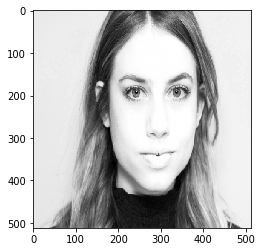

In [163]:
plt.imshow(image, cmap='gray')

image.reshape turns (width, height) into (batch, width, height, channel)

In [139]:
from PIL import Image

In [140]:
pil_image = Image.open('image.png')

In [160]:
pil_image = pil_image.resize((512, 512))

In [161]:
image = np.array(pil_image)[:,:,0]

In [162]:
img = image.reshape(1,*image.shape,1)

In [164]:
model.predict(img)

array([[1.0000000e+00, 7.9836757e-25, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00]], dtype=float32)

In [165]:
z_i = z.predict(img)

In [167]:
G = np.matmul(z_i.T, z_i)

In [168]:
G

array([[    0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
            0.   ,     0.   ,     0.   ,     0.   ],
       [    0.   , 25680.615,     0.   ,     0.   ,     0.   ,     0.   ,
        25533.215, 15307.407,     0.   ,     0.   ],
       [    0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
            0.   ,     0.   ,     0.   ,     0.   ],
       [    0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
            0.   ,     0.   ,     0.   ,     0.   ],
       [    0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
            0.   ,     0.   ,     0.   ,     0.   ],
       [    0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
            0.   ,     0.   ,     0.   ,     0.   ],
       [    0.   , 25533.215,     0.   ,     0.   ,     0.   ,     0.   ,
        25386.662, 15219.547,     0.   ,     0.   ],
       [    0.   , 15307.407,     0.   ,     0.   ,     0.   ,     0.   ,
        15219.547,  9124.264,     0. 

In [171]:
np.max(np.linalg.eig(G)[0])

60191.54